# INFO-F-422 -  Statistical Foundations of Machine Learning 

### De Vos Sebastien - __[sebastien.de.vos@ulb.be](mailto:student1@ulb.ac.be) - Student ID 459907__
### Kalai Tarik - __[Tarik.Kalai@ulb.be](mailto:student2@ulb.ac.be) - Student ID 459631__
### Rubas Diego - __[Diego.Rubas@ulb.be](mailto:student3@ulb.ac.be) - Student ID 459733__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


# Exploratory Data Anaylsis

In this section we will be viewing and understanding the data that we have.

### Data recuperation

In [2]:
training_set_features <- read.csv("sample_data/training_set_features.csv", stringsAsFactors  = T)
training_set_labels <- read.csv("sample_data/training_set_labels.csv", stringsAsFactors  = T)
test_set_features <- read.csv("sample_data/test_set_features.csv", stringsAsFactors  = T)
submission_format<- read.csv("sample_data/submission_format.csv", stringsAsFactors  = T)


### Dimensions of the data samples. 

In [3]:


cat("dimension of test_set_features: ",  dim(test_set_features), "\n")# This will be the input to the model (after it had been trained), the answer the model
#will be providing will then be sent to DrivenData. 

cat("dimension of training_set_labels: ", dim(training_set_labels), "\n") # Answers to training_set_features. 

cat("dimension of training_set_features : ", dim(training_set_features), "\n") # Corresponding to a sample of data: will be used for training set and test set. 
#The result will then be "validated" with a comparison with training_set_labels




dimension of test_set_features:  26708 36 
dimension of training_set_labels:  26707 3 
dimension of training_set_features :  26707 36 


### Data preview

In [4]:
# head(training_set_features)

# summary(training_set_features)

# dim(na.omit(training_set_features))

# apply(is.na(training_set_features),2, any)

# for the feature: h1n1_concern it has been decided that a mean (sum of all values different of NA and then divide by the total number of variables) 
# will be computed for the Null values knowing that there is 0.34 % of missing values. 

length <- dim(training_set_features)[1]
count_NA <- 0
non_NA_var <- 0
c0 <- 0
c1 <- 0
c2 <- 0
c3 <- 0

for (i in 1:length){
  id <- training_set_features[i, 1]
  var <- training_set_features[i,2]
  if(is.na(var)){
    count_NA <- count_NA + 1
  }
  else if(var == 0){
    c0 <- c0 +1
    non_NA_var <- non_NA_var + var
  }
  else if(var == 1){
    c1 <- c1 +1
    non_NA_var <- non_NA_var + var

  }
  else if(var == 2){
    c2 <- c2 +1
    non_NA_var <- non_NA_var + var
  }
  else if(var == 3){
    c3 <- c3 +1
    non_NA_var <- non_NA_var + var
  }
}

mean_TS <- mean(training_set_features[,2], na.rm = T) # Mean des val. NA
sd_TS <- sqrt(var(training_set_features[,2], na.rm = T))  # Ecart type des valeurs NA
mean_TS
sd_TS
empirical_mean <- (non_NA_var)/(length-count_NA)
cat("Mean for NA values :", empirical_mean, "\n")
cat("Ratio of missing values: ", (count_NA/length)*100, "\n")
cat("Number of missing values: ", count_NA, "\n")

cat("here: ", sum(is.na(training_set_features[,2])), "\n")
training_set_features[is.na(training_set_features[,2]), 2] <- round(mean_TS + sd_TS/2)
mean(training_set_features[,2], na.rm = T) # Mean des val. NA
sqrt(var(training_set_features[,2], na.rm = T)) 

print(sum(is.na(training_set_features[,2])))

# pos_val <- (length-count_NA)
# pz <- c(c0/pos_val, c1/pos_val, c2/pos_val, c3/pos_val)
# ez <- 1*pz[2] + 2*pz[3] + 3*pz[4]
# sd_w <- sqrt((0-ez)^2*pz[1] + (1 - ez)^2 * pz[2] + (2 - ez)^2 * pz[3] + (3 - ez)^2 * pz[4])
# cat("c0: ", c0, "c1: ", c1, "c2: ", c2, "c3: ", c3, "\n")
# cat("Variance :", sd_w, "\n")
# N <-length
# for( i in 2:24){
#   cat("results:", "\n")
#   unique(training_set_features[i]))
# }
unique(training_set_features[4])

# test <- list(names(training_set_features)[1])

[1] 1.618486

[1] 0.9103107

Mean for NA values : 1.618486 
Ratio of missing values:  0.344479 
Number of missing values:  92 
here:  92 


[1] 1.6198

[1] 0.9090163

[1] 0


,behavioral_antiviral_meds
,<int>
1,0
24,1
137,NA


In [5]:
# unique(training_set_features[36])
# mean(training_set_features[,1], na.rm = T)
length(which(is.na(training_set_features[,3])))

[1] 116

In [60]:


# To generalise the function we need to take into account the empty answers and not only NA. 
training_set_features <- read.csv("sample_data/training_set_features.csv", stringsAsFactors  = T)
cleanData <- function() {
    res <- list()
    for (i in 2:22) {
        if (length(which(is.na(training_set_features[,i]))) > 0) { #Check if there is any NA in the column
            old_mean_ts <- mean(training_set_features[,i], na.rm = T) #compute old_mean
            old_sd_ts <- sqrt(var(training_set_features[,i], na.rm = T)) #compute old_sd
            feature_name<- names(training_set_features[i]) #remember the name of the feature we are dealing with
            training_set_features[is.na(training_set_features[,i]), i] <- round(old_mean_ts + old_sd_ts/2) #modify the data
            new_mean_ts <- mean(training_set_features[,i], na.rm = T) #compute new mean
            new_sd_ts <- sqrt(var(training_set_features[,i], na.rm = T)) #compute new sd
            info <- list(old_mean_ts, old_sd_ts, new_mean_ts, new_sd_ts) #put all the info together
            res <- append(res, list(feature_name, info)) # add the name of the feature that goes with the info. 
        }
    }
    return(training_set_features) #return
}
index <- 22
head(training_set_features[index])
print(unique(training_set_features[index]))
cat("here: ", sum(is.na(training_set_features[, index])), "\n")
table(training_set_features[, index])

training_set_features <- cleanData()
print(unique(training_set_features[2]))




    1     2     3     4     5 
11870  7633    94  4852  1721 

  h1n1_concern
1            1
2            3
5            2
7            0


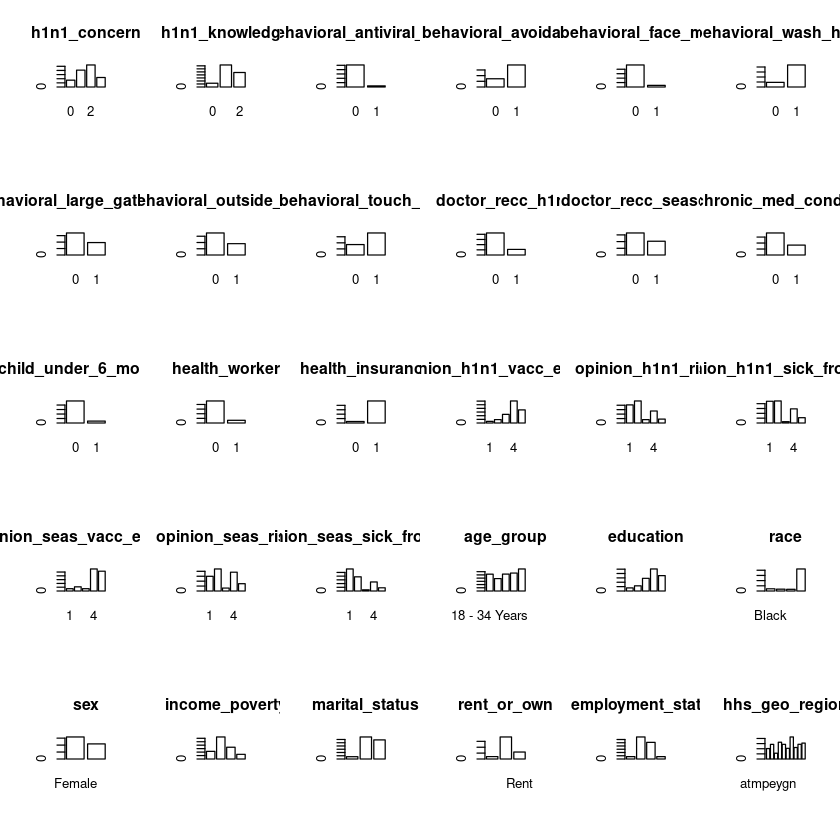

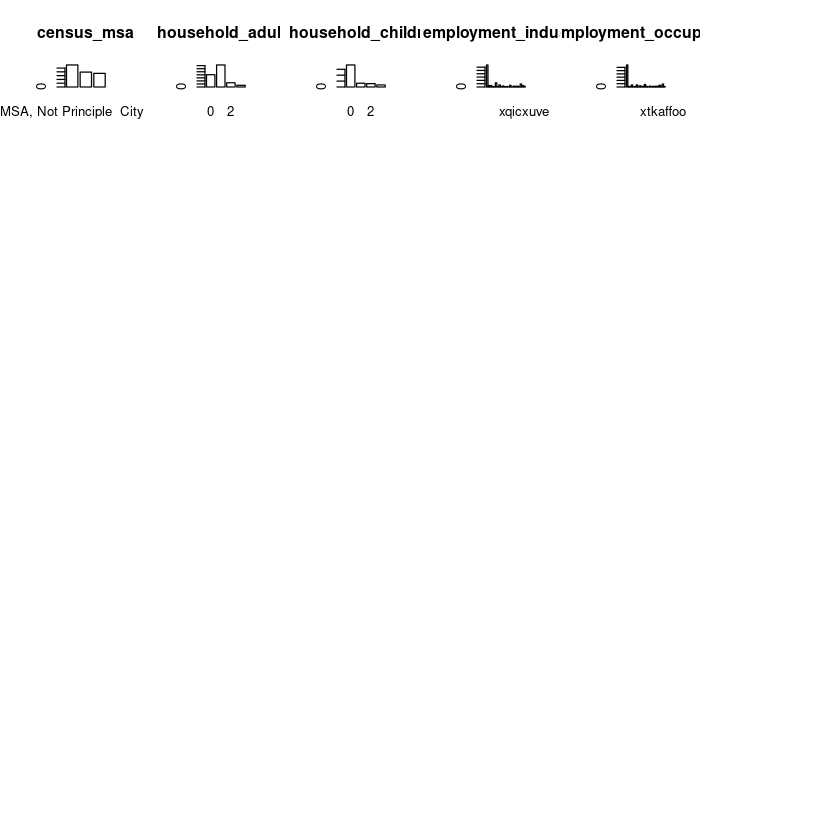

In [44]:
par(mfrow=c(5,6))

# data_to_plot <- table(training_set_features["h1n1_concern"])
# data_to_plot <- table(t(training_set_features["h1n1_knowledge"]))

names<-names(training_set_features)
for(i in 2:length(names)){
barplot(table(training_set_features[names[i]]), col="white", main=names[i],beside=T)
    
}



In [ ]:
# Normalisation 

#X_norm = (x - x_min)/(x_max - x_min) #To do only for the "broken data" => see plot. 

# Data preprocessing

## Missing value imputation

## Feature engineering

## Feature selection



# Model selection

## Model 1

## Model 2

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  
\begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


# Alternative models





# Conclusions